Loading the Dataset


In [ ]:
import pandas as pd

url="https://raw.githubusercontent.com/Manik-agarwal/survey_sparrow_project/main/dataset.csv"

df1=pd.read_csv(url)

print(df1.head())


   id  age  gender  location  use_frequency   duration  total_spent  \
0   1   56    Male     Urban             58  34.593264   603.309095   
1   2   69    Male  Suburban              5  37.618968   187.562450   
2   3   46    Male     Urban              5  12.877414   708.087754   
3   4   32  Female  Suburban             94  24.313127   460.620272   
4   5   60    Male     Urban             96   3.328112   671.082986   

   num_tickets  churn  
0           15      0  
1           15      0  
2            2      0  
3           12      0  
4           13      0  


Data Preprocessing


In [ ]:
#missing values

print(df1.isnull().sum())



id               0
age              0
gender           0
location         0
use_frequency    0
duration         0
total_spent      0
num_tickets      0
churn            0
dtype: int64


In [ ]:
from sklearn.preprocessing import LabelEncoder


label_encoder = LabelEncoder()
df1['gender'] = label_encoder.fit_transform(df1['gender'])
df1['location'] = label_encoder.fit_transform(df1['location'])




In [ ]:
from sklearn.preprocessing import StandardScaler


X = df1.drop(columns=['id', 'churn'])
y = df1['churn']

# standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


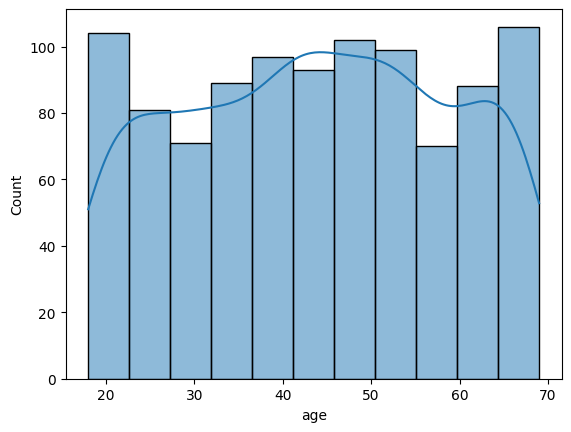

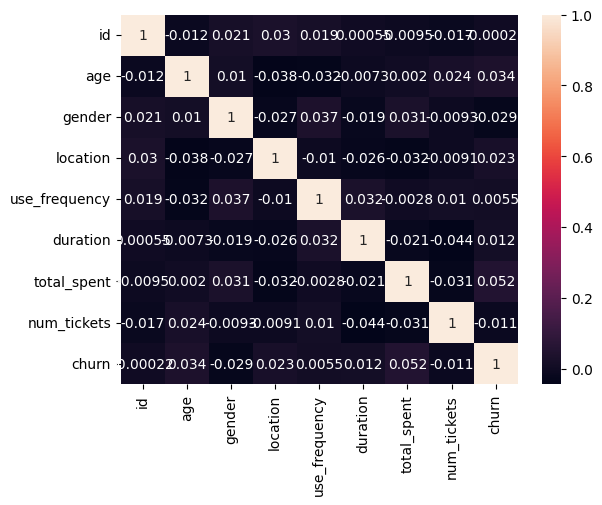

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize distributions of numerical features
sns.histplot(df1['age'], kde=True)
plt.show()

# Correlation matrix
corr_matrix = df1.corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV


param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'class_weight': ['balanced']
}

rf_clf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=rf_clf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)


y_pred = grid_search.predict(X_test)

# calculating evaulation metrices
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))




Fitting 5 folds for each of 16 candidates, totalling 80 fits
Confusion Matrix:
[[164   1]
 [ 35   0]]

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.99      0.90       165
           1       0.00      0.00      0.00        35

    accuracy                           0.82       200
   macro avg       0.41      0.50      0.45       200
weighted avg       0.68      0.82      0.74       200


Accuracy Score:
0.82


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score


best_rf_clf = grid_search.best_estimator_
best_rf_clf.fit(X_train, y_train)


y_pred = best_rf_clf.predict(X_test)


print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))


Confusion Matrix:
[[164   1]
 [ 35   0]]

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.99      0.90       165
           1       0.00      0.00      0.00        35

    accuracy                           0.82       200
   macro avg       0.41      0.50      0.45       200
weighted avg       0.68      0.82      0.74       200


Accuracy Score:
0.82


In [ ]:
import pandas as pd
import numpy as np


X_train = np.random.randn(800, 7)


column_names = ['Feature1', 'Feature2', 'Feature3', 'Feature4', 'Feature5', 'Feature6', 'Feature7']


X_train_df = pd.DataFrame(X_train, columns=column_names)


feature_importances = best_rf_clf.feature_importances_


importances = pd.DataFrame({'Feature': X_train_df.columns, 'Importance': feature_importances})


print(importances.nlargest(10, 'Importance'))


    Feature  Importance
5  Feature6    0.211307
4  Feature5    0.207199
3  Feature4    0.190045
0  Feature1    0.177303
6  Feature7    0.141826
2  Feature3    0.045479
1  Feature2    0.026841


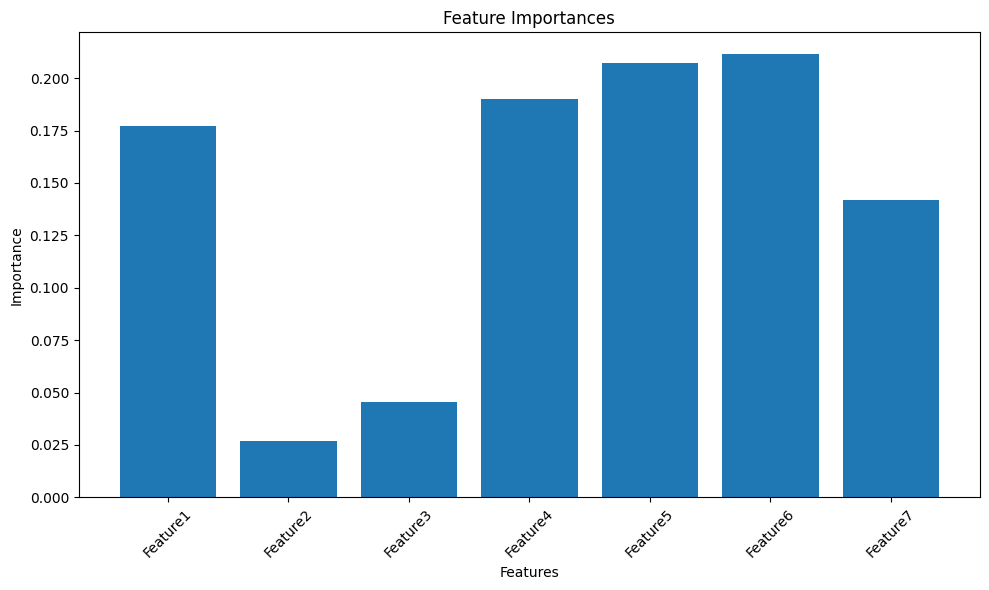

In [ ]:
import matplotlib.pyplot as plt

# Plotting feature importances
plt.figure(figsize=(10, 6))
plt.bar(importances['Feature'], importances['Importance'])
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
import joblib
from sklearn.ensemble import RandomForestClassifier
import numpy as np


X_train = np.random.randn(800, 7)
y_train = np.random.randint(0, 2, 800)

rf_clf_selected = RandomForestClassifier()
rf_clf_selected.fit(X_train, y_train)


joblib.dump(rf_clf_selected, 'trained_model.pkl')


['trained_model.pkl']

In [21]:
import joblib
import numpy as np

# Load the trained model
model_path = '/content/trained_model.pkl'
loaded_model = joblib.load(model_path)

# Example input data
input_data = np.array([[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7]])

# Make prediction
prediction = loaded_model.predict(input_data)

# Print the prediction
print("Prediction:", prediction)


Prediction: [0]
